# Import libraries

In [9]:
import pandas as pd
import config
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os

In [10]:
! ls ../data/clean

bos_taurus_nohuman_readcount.tsv
gtdb_species.tsv
human_clean.tsv
humann_genefamilies_clean.tsv
humann_genefamilies_overall_clean.tsv
humann_genefamilies_overall_clean_rpk.tsv
humann_genefamilies_overall_clean_rpk_rarified.tsv
humann_pathabundance_clean.tsv
humann_pathcoverage_clean.tsv
metadata.tsv
reduced_CAG_profiles_clean.tsv
script.sh


In [11]:
depth = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.tsv"), sep="\t", index_col=0)["depth"]
depth

Sample_ID
magic.0001    1544781
magic.0004    1167038
magic.0006    1720636
magic.0007    6825017
magic.0008    2928044
               ...   
magic.6595    1562968
magic.6597    2113880
magic.6598    1650388
magic.6599    1519641
magic.6600    1389563
Name: depth, Length: 3442, dtype: int64

In [16]:
depth[depth > 25000000].shape[0]

43

In [5]:
from tqdm import tqdm

chunksize = 100000
number_of_rows = 3688215
iterator = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_overall_clean.tsv"), sep="\t", index_col=0, chunksize=chunksize)

header = True
i = 0
rpk_sums = np.zeros(depth.shape[0])

for chunk in iterator:
    i += 1
    print(chunksize * i / number_of_rows)

    rpk = chunk * depth
    rpk_sum_curr = rpk.sum(axis=0)
    rpk_sums += rpk_sum_curr.values.flatten()

0.027113386828045545
0.05422677365609109
0.08134016048413664
0.10845354731218218
0.13556693414022772
0.16268032096827328
0.18979370779631882
0.21690709462436436
0.2440204814524099
0.27113386828045544
0.298247255108501
0.32536064193654657
0.3524740287645921
0.37958741559263764
0.4067008024206832
0.4338141892487287
0.46092757607677426
0.4880409629048198
0.5151543497328653
0.5422677365609109
0.5693811233889564
0.596494510217002
0.6236078970450475
0.6507212838730931
0.6778346707011387
0.7049480575291842
0.7320614443572298
0.7591748311852753
0.7862882180133208
0.8134016048413664
0.8405149916694119
0.8676283784974574
0.894741765325503
0.9218551521535485
0.9489685389815941
0.9760819258096396
1.0031953126376851


In [14]:
with open("../output/logs/rpk_sums.npy", 'wb') as f:
    np.save(f, rpk_sums)
rpk_sums    

array([ 6906128.8994215 ,  5802719.62799366,  3937895.75321897, ...,
       15846069.9475319 , 12192988.02286349, 12910537.25511871])

In [50]:
# set figure details
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

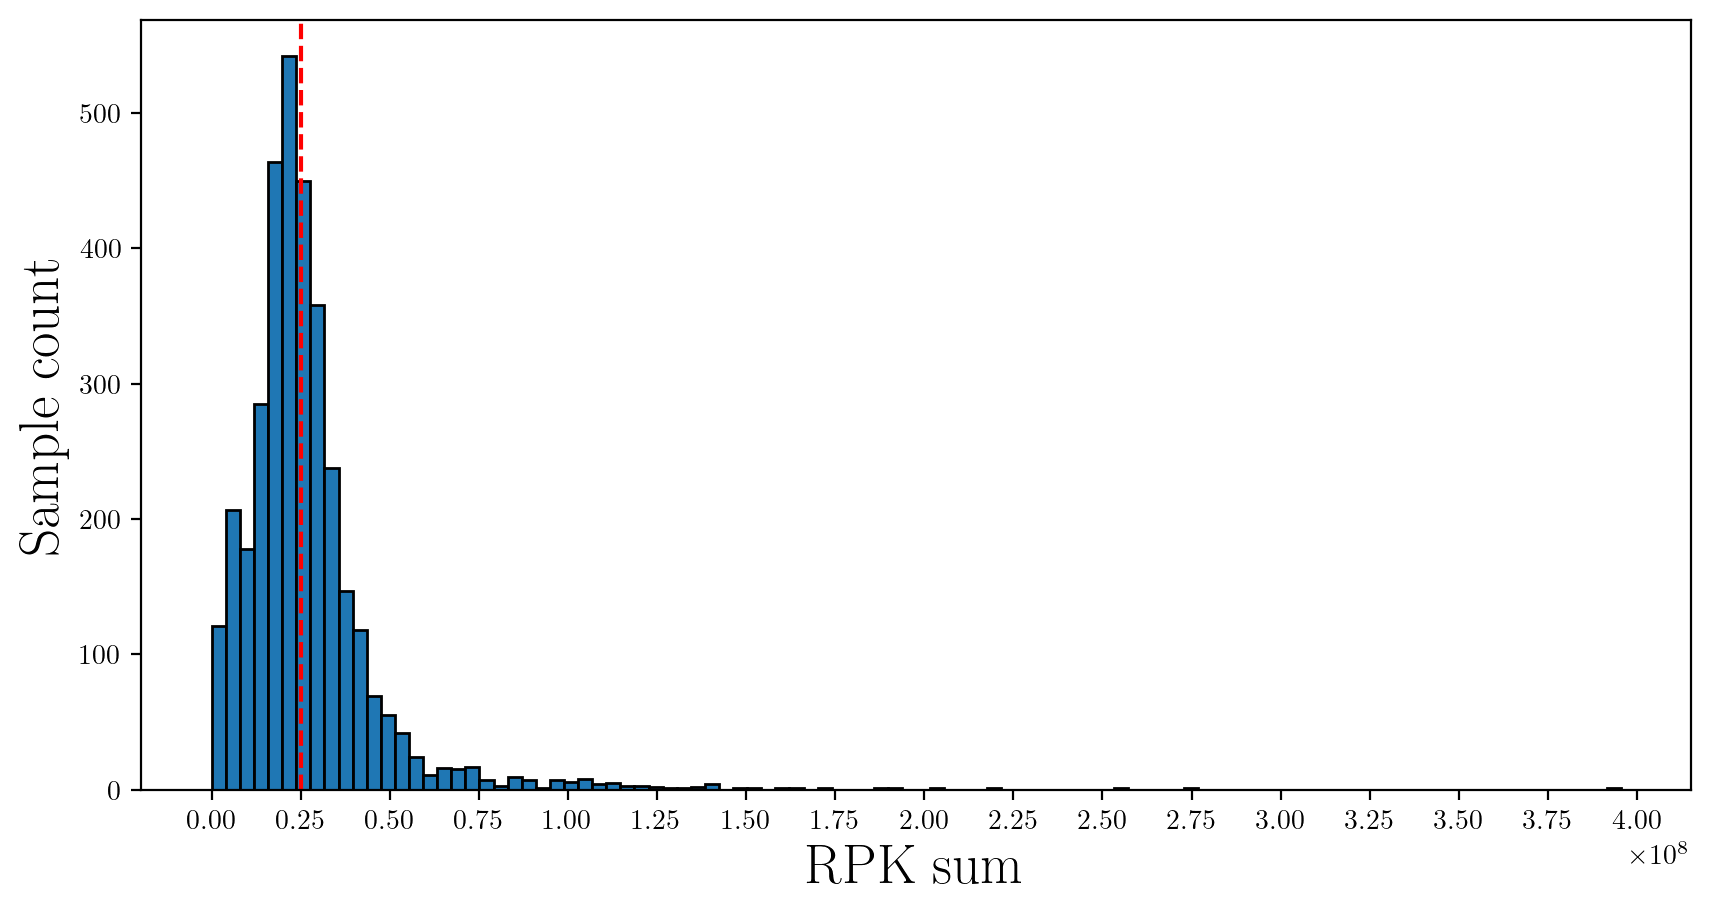

In [16]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(rpk_sums, bins=100, edgecolor="black")
plt.xlabel("RPK sum", fontsize=20)
plt.ylabel("Sample count", fontsize=20)
plt.xticks(np.arange(0, 4_00_000_000 + 1, 25_000_000))
plt.axvline(25_000_000, c="r", linestyle="--")

plt.show()

In [57]:
rpks = [100, 500, 3, 0, 20]
depth = 400
inp = []
for i, rp in enumerate(rpks):
    inp = inp + rp * [i]
    
choices = list(np.random.choice(inp, size=depth, replace=False))
np.unique(choices + [0, 1, 2, 3, 4], return_counts=True)[1] - 1

array([ 74, 312,   1,   0,  13])

In [5]:
chunksize = 100000
number_of_rows = 3688215
iterator = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_overall_clean.tsv"), sep="\t", chunksize=chunksize, index_col=0)

i = 0
header = True

for chunk in iterator:
    print(i * chunksize / number_of_rows)
    i += 1
    rpk = chunk * depth
    
    rpk.to_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_overall_clean_rpk.tsv"),
    header=header, mode='w' if header else "a", sep="\t")
        
    header = False

0.0
0.027113386828045545
0.05422677365609109
0.08134016048413664
0.10845354731218218
0.13556693414022772
0.16268032096827328
0.18979370779631882
0.21690709462436436
0.2440204814524099
0.27113386828045544
0.298247255108501
0.32536064193654657
0.3524740287645921
0.37958741559263764
0.4067008024206832
0.4338141892487287
0.46092757607677426
0.4880409629048198
0.5151543497328653
0.5422677365609109
0.5693811233889564
0.596494510217002
0.6236078970450475
0.6507212838730931
0.6778346707011387
0.7049480575291842
0.7320614443572298
0.7591748311852753
0.7862882180133208
0.8134016048413664
0.8405149916694119
0.8676283784974574
0.894741765325503
0.9218551521535485
0.9489685389815941
0.9760819258096396


In [18]:
len(chunks)

37

In [38]:
for chunk in tqdm(chunks):
    display(chunk)
    break

  0%|                                                                        | 0/37 [00:00<?, ?it/s]

,magic.0001,magic.0004,magic.0006,magic.0007,magic.0008,magic.0010,magic.0011,magic.0012,magic.0013,magic.0014,...,magic.6590,magic.6591,magic.6592,magic.6593,magic.6594,magic.6595,magic.6597,magic.6598,magic.6599,magic.6600
# Gene Family,,,,,,,,,,,,,,,,,,,,,
UNMAPPED,588828.0,504746.0,3232867.0,4399195.0,3416435.0,4408358.0,646400.0,5839996.0,648531.0,11653672.0,...,5659421.0,3781278.0,5351865.0,5359641.0,4605621.0,5483031.0,5633743.0,3905760.0,4639618.0,3667765.0
UniRef90_A0A009DWL0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UniRef90_A0A009E0R3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UniRef90_A0A009E282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UniRef90_A0A009E8H7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UniRef90_A0A0A8VZ49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UniRef90_A0A0A8VZ56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UniRef90_A0A0A8VZ83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


  0%|                                                                        | 0/37 [00:00<?, ?it/s]


In [17]:
with open("../output/logs/rpk_sums.npy", 'rb') as f:
    rpk_sums = np.load(f)
rpk_sums    

array([ 6906128.8994215 ,  5802719.62799366,  3937895.75321897, ...,
       15846069.9475319 , 12192988.02286349, 12910537.25511871])

In [18]:
(rpk_sums > 25000000).sum()

1492

In [37]:
gene_sample_counts = []
sample_richness = np.zeros((3442,))

chunksize = 100000
number_of_rows = 3688215
iterator1 = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_overall_clean_rpk_rarified.tsv"), sep="\t", chunksize=chunksize, index_col=0)
iterator2 = pd.read_csv(os.path.join(config.CLEAN_DIR, "humann_genefamilies_overall_clean_rpk.tsv"), sep="\t", chunksize=chunksize, index_col=0)

i = 0
header = True

for chunk1, chunk2 in zip(iterator1, iterator2):
    print(i * chunksize / number_of_rows)
    i += 1
    all_cols = chunk2.columns
    lt25 = set(all_cols) - set(chunk1.columns)
    chunk2 = chunk2[lt25]
    chunk = pd.concat([chunk1, chunk2], axis=1)
    chunk = chunk[all_cols]
    gene_sample_counts.append((chunk > 0).sum(axis=1))
    sample_richness += (chunk > 0).sum(axis=0).values.flatten()
    
    chunk.to_csv(os.path.join(config.CLEAN_DIR, "genefamilies_rarified.tsv"),
        header=header, mode='w' if header else "a", sep="\t")
        
    header = False

0.0


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.027113386828045545


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.05422677365609109


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.08134016048413664


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.10845354731218218


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.13556693414022772


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.16268032096827328


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.18979370779631882


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.21690709462436436


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.2440204814524099


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.27113386828045544


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.298247255108501


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.32536064193654657


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.3524740287645921


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.37958741559263764


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.4067008024206832


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.4338141892487287


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.46092757607677426


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.4880409629048198


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.5151543497328653


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.5422677365609109


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.5693811233889564


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.596494510217002


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.6236078970450475


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.6507212838730931


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.6778346707011387


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.7049480575291842


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.7320614443572298


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.7591748311852753


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.7862882180133208


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.8134016048413664


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.8405149916694119


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.8676283784974574


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.894741765325503


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.9218551521535485


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.9489685389815941


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


0.9760819258096396


/var/folders/w8/85y9rkfs49x53d7kk_ql70bc0000gn/T/ipykernel_25827/3195462478.py:17: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  chunk2 = chunk2[lt25]


In [38]:
sample_richness

array([ 64331.,  69105.,  21372., ..., 142285., 155385.,  92319.])

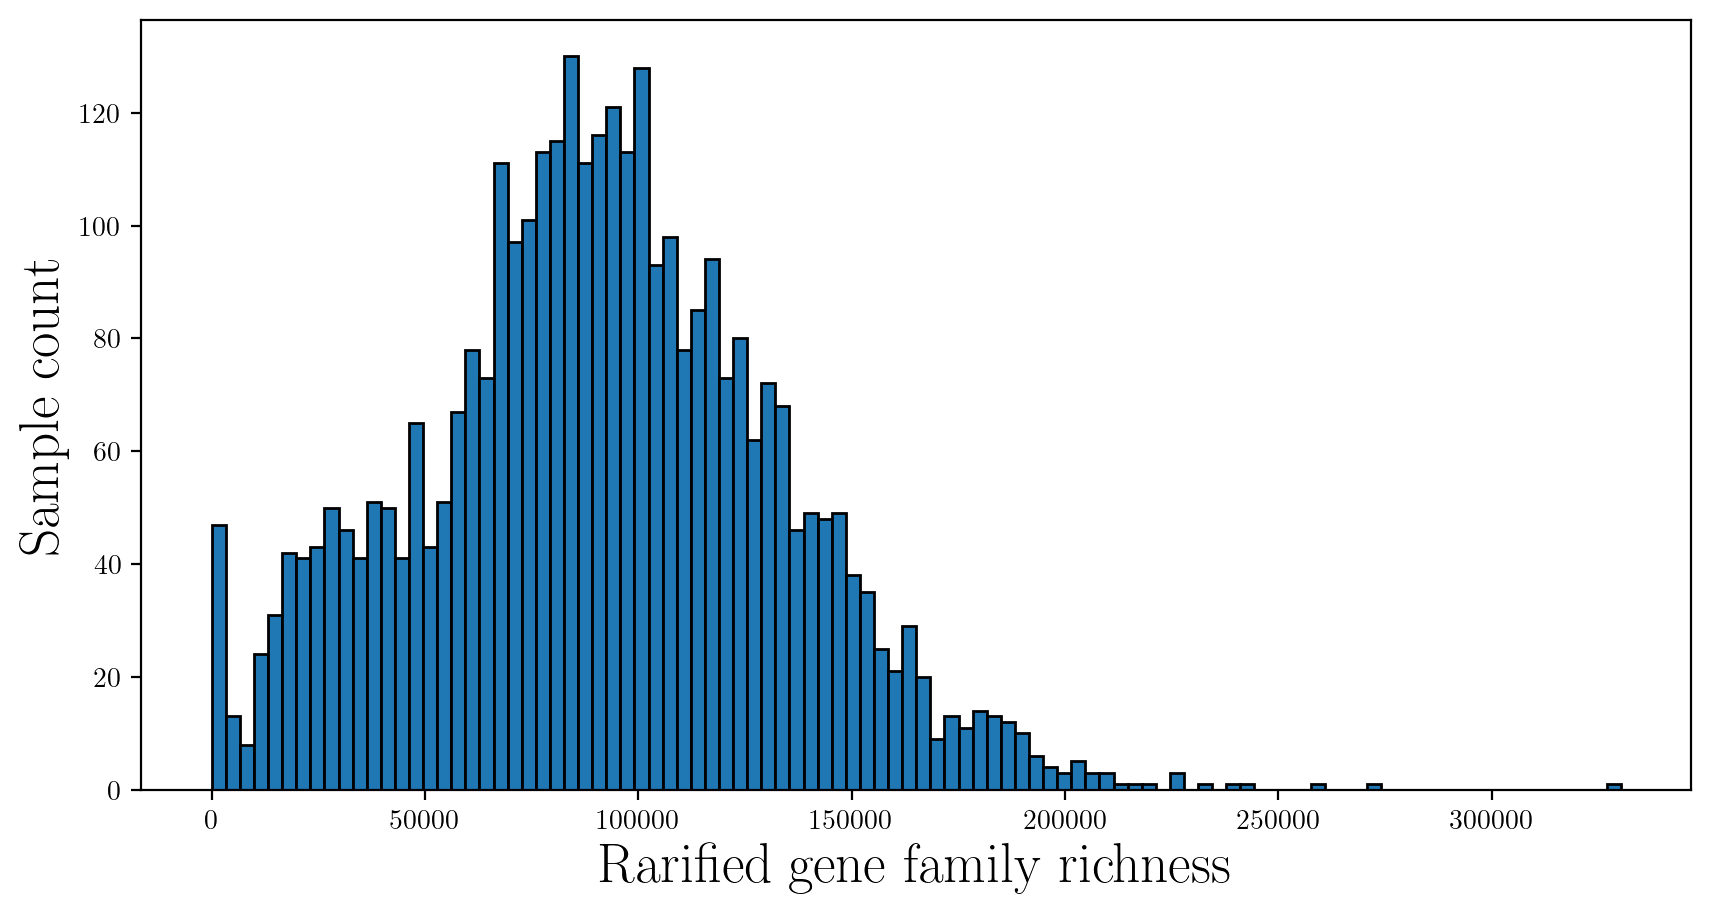

In [51]:
plt.figure(figsize=(10, 5), dpi=200)
plt.hist(sample_richness, bins=100, edgecolor="black")
plt.xlabel("Rarified gene family richness", fontsize=20)
plt.ylabel("Sample count", fontsize=20)

plt.show()

In [44]:
sum([g.shape[0] for g in gene_sample_counts])

3688214

In [49]:
sum([(g > 0).sum() for g in gene_sample_counts])

3546609

In [60]:
sample_richness.shape

(3442,)

In [66]:
pd.DataFrame(sample_richness, index=chunk.columns, columns=["rarified_gene_richness"]).to_csv(
    os.path.join(config.CLEAN_DIR, "rarified_gene_richness.tsv"), sep="\t")